In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [2]:
df = pd.read_csv('data/price_data.csv',index_col="調査日",parse_dates=True)

In [3]:
def make_dataset(raw_data, look_back):
    _X = []
    _y = []

    for i in range(len(raw_data) - look_back):
        _X.append(raw_data[i : i + look_back])
        _y.append(raw_data[i + look_back])
    _X = np.array(_X).reshape(len(_X), look_back, 1)
    _y = np.array(_y).reshape(len(_y), 1)

    return _X, _y

In [4]:
df_X = df[[col for col in df.columns if col not in ['キャベツ']]]
df_y = df["キャベツ"]

In [5]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
df_scale = pd.DataFrame(scaler_X.fit_transform(df_y[:,np.newaxis]).flatten(),index=df.index,columns=df.columns)

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [6]:
df_scale

,キャベツ
調査日,
2017-01-02,0.842462
2017-01-09,0.481189
2017-01-16,0.257544
2017-01-23,0.291951
2017-01-30,0.343562
...,...
2022-02-07,-0.206950
2022-02-14,0.188730
2022-02-21,0.171527


In [8]:
look_back=12
X_kyabetu, y_kyabetu = make_dataset(df_scale["キャベツ"], look_back=look_back)
#X_aititemp, y_aititemp = make_dataset(df_scale_X["愛知平均気温"], look_back=look_back)
#X_aitirain, y_aitirain = make_dataset(df_scale_X["愛知降水量の合計"], look_back=look_back)
#X_aitisum, y_aitisum = make_dataset(df_scale_X["愛知日照時間"], look_back=look_back)
#X_chibatemp, y_chibatemp = make_dataset(df_scale_X["千葉平均気温"], look_back=look_back)
#X_chibarain, y_chibarain = make_dataset(df_scale_X["千葉降水量の合計"], look_back=look_back)
#X_chibasum, y_chibasum = make_dataset(df_scale_X["千葉日照時間"], look_back=look_back)
#X_gunmatemp, y_gunmatemp = make_dataset(df_scale_X["群馬平均気温"], look_back=look_back)
#X_gunmarain, y_gunmarain = make_dataset(df_scale_X["群馬降水量の合計"], look_back=look_back)
#X_gunmasum, y_gunmasum = make_dataset(df_scale_X["群馬日照時間"], look_back=look_back)

In [9]:
#X_con = np.concatenate([X_kyabetu, X_aititemp, X_aitirain, X_aitisum,X_chibatemp,X_chibarain,
#                        X_chibasum,X_gunmatemp,X_gunmarain,X_gunmasum],axis=2)

In [10]:
X = X_kyabetu
y = y_kyabetu

# データを過去分（訓練に用いる分）と未来分（未来の予測に用いる分）に分割
X_past = X[:-24]
X_future = X[-24:]
y_past = y[:-24]
y_future = y[-24:]

# 訓練データを定義
X_train = X_past
y_train = y_past

In [11]:
X_train.shape

(235, 12, 1)

In [12]:
y_train.shape

(235, 1)

In [13]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

model = Sequential()
x = model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(8))
model.add(Dense(1)) #出力層はデータ数に合わせる

model.compile(loss='mean_squared_error', optimizer='adam')

2022-03-29 09:06:03.843765: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-29 09:06:03.844140: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1)

Train on 235 samples
Epoch 1/100


2022-03-29 09:06:05.571946: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_4998_5467_specialized_for_StatefulPartitionedCall_1_at___inference_distributed_function_5565' and '__inference___backward_standard_lstm_4998_5467' both implement 'lstm_d1217c25-84d6-482c-9bbd-99bfab226b12' but their signatures do not match.


235/235 [==============================] - 7s 31ms/sample - loss: 0.8012
Epoch 2/100
235/235 [==============================] - 4s 19ms/sample - loss: 0.6460
Epoch 3/100
235/235 [==============================] - 4s 18ms/sample - loss: 0.4896
Epoch 4/100
235/235 [==============================] - 4s 18ms/sample - loss: 0.3696
Epoch 5/100
235/235 [==============================] - 4s 18ms/sample - loss: 0.3181
Epoch 6/100
235/235 [==============================] - 4s 19ms/sample - loss: 0.2746
Epoch 7/100
235/235 [==============================] - 4s 19ms/sample - loss: 0.2068
Epoch 8/100
235/235 [==============================] - 5s 19ms/sample - loss: 0.1727
Epoch 9/100
235/235 [==============================] - 4s 19ms/sample - loss: 0.1456
Epoch 10/100
235/235 [==============================] - 5s 20ms/sample - loss: 0.1208
Epoch 11/100
235/235 [==============================] - 4s 19ms/sample - loss: 0.1041
Epoch 12/100
235/235 [==============================] - 5s 20ms/sample - lo

In [15]:
predictions = model.predict(X_past)
future_predictions = model.predict(X_future)

2022-03-29 09:14:38.408159: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_52911' and '__inference_standard_lstm_52800_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_53571' both implement 'lstm_2bbea492-940b-4126-bd16-e2643b402144' but their signatures do not match.


In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(scaler_X.inverse_transform(future_predictions),scaler_X.inverse_transform(y_future))

114.19797623789297

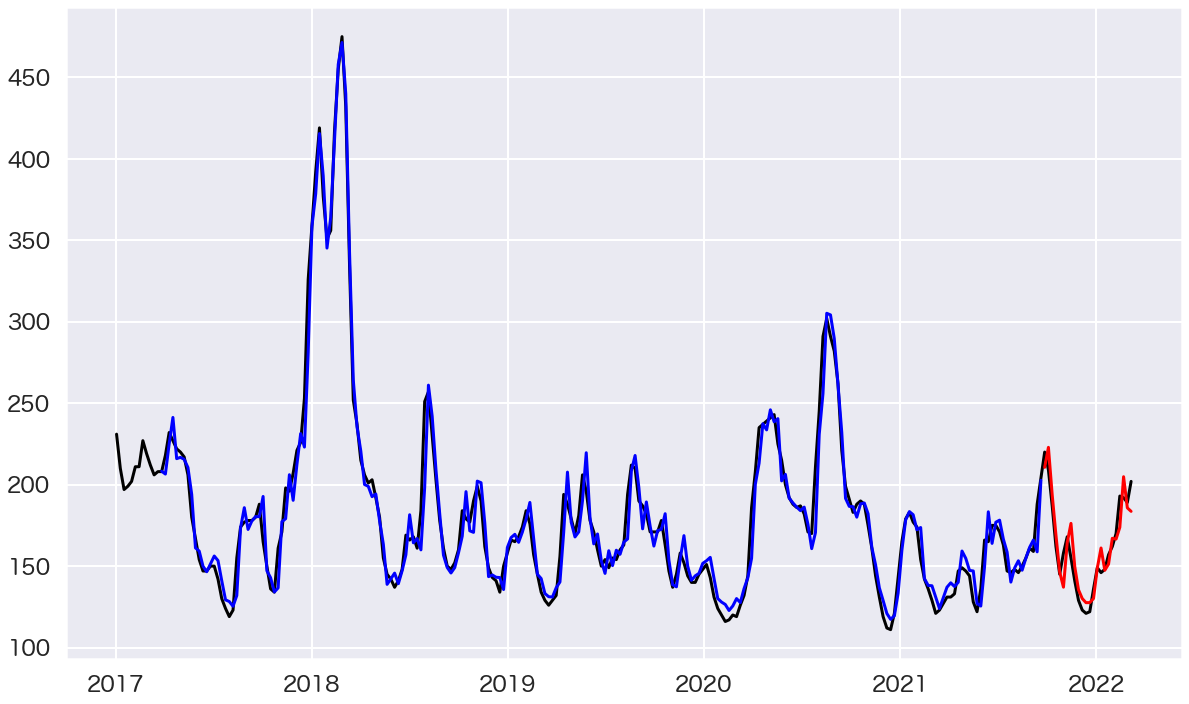

In [17]:
sns.set(context="poster",font="Hiragino Maru Gothic Pro")
fig = plt.subplots(figsize=(20,12))

#正解のプロット
plt.plot(df["キャベツ"],color="black")
# トレーニングデータのプロット
df_train_pred = pd.DataFrame(scaler_X.inverse_transform(predictions),
                       index=df[12:-24].index)
plt.plot(df_train_pred,color="blue")

# テストデータのプロット
df_train_pred = pd.DataFrame(scaler_X.inverse_transform(future_predictions),
                       index=df[-24:].index)
plt.plot(df_train_pred,color="red")



In [26]:
model.save('model.h5')

In [19]:
df_scale[-12:]

,キャベツ
調査日,
2021-12-20,-1.032716
2021-12-27,-0.791868
2022-01-03,-0.568222
2022-01-10,-0.619833
2022-01-17,-0.585426
2022-01-24,-0.430595
2022-01-31,-0.344577
2022-02-07,-0.206950
2022-02-14,0.188730


In [20]:
df_f = df_scale[-12:].values.tolist()
df_f = np.array(df_f)
df_f = df_f.reshape(1,12,1)
future_f = model.predict(df_f)

In [21]:
scaler_X.inverse_transform(future_f)

array([[214.9343]], dtype=float32)

実際の値段202

In [22]:
202 - 217.67703

-15.677030000000002

In [23]:
pred_list = []

In [24]:
pred_list.append(df_f)

In [25]:
pred_list[0][0][:]

array([[-1.0327163 ],
       [-0.79186766],
       [-0.5682225 ],
       [-0.61983292],
       [-0.58542597],
       [-0.4305947 ],
       [-0.34457733],
       [-0.20694954],
       [ 0.18873036],
       [ 0.17152689],
       [ 0.11991647],
       [ 0.34356163]])

In [ ]:
pred_list.